In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

True

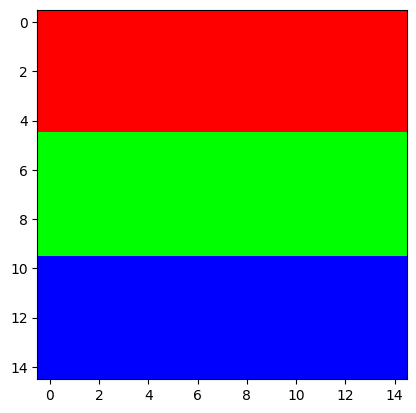

In [39]:
img = np.zeros((15,15, 3), 'uint8')
img[0:5,:,:] = np.array([0, 0, 255])
img[5:10,:,:] = np.array([0, 255, 0])
img[10:15,:,:] = np.array([255, 0, 0])
plt.imshow(img[..., ::-1])
cv2.imwrite("../../images/3color.png", img)

Text(0.5, 1.0, 'Original')

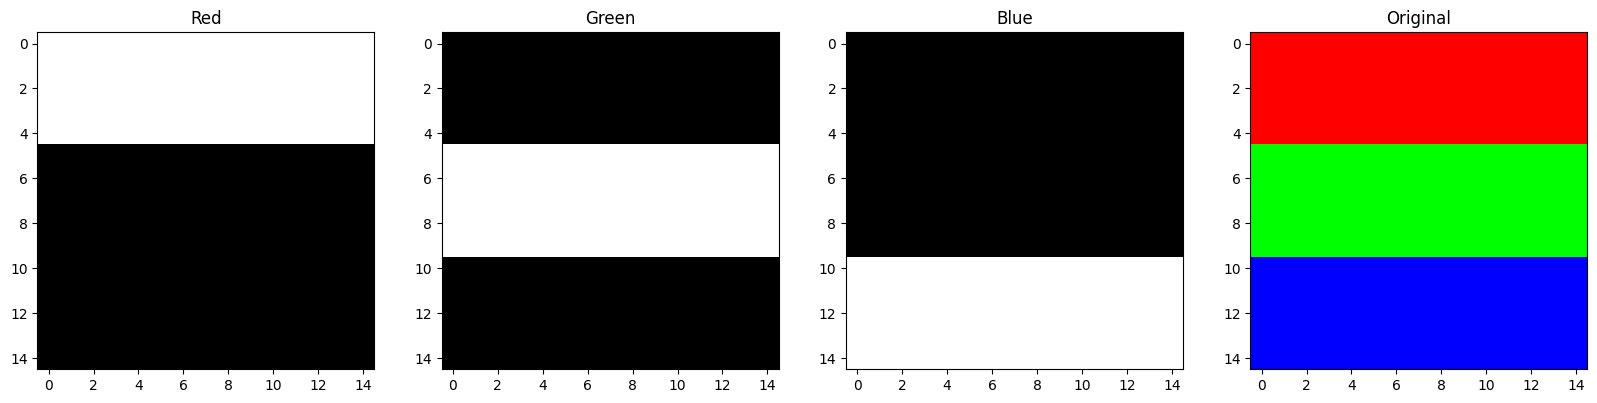

In [40]:
b,g,r = cv2.split(img)

plt.figure(figsize=(20, 5))
plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green")
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue")

plt.subplot(144);plt.imshow(img[...,::-1]);plt.title("Original")

Text(0.5, 1.0, 'Original')

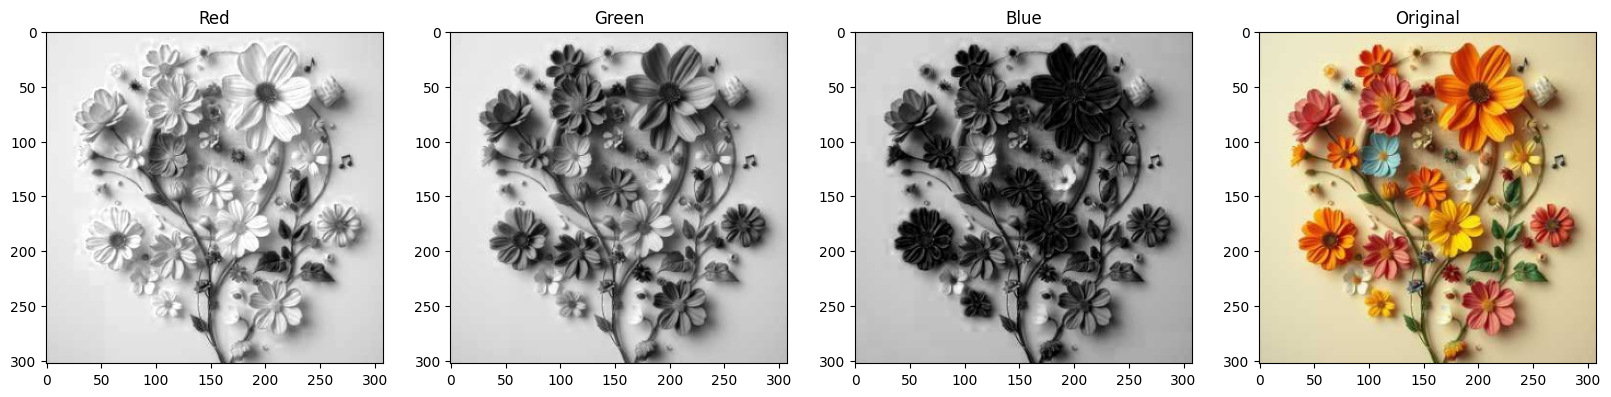

In [41]:
img = cv2.imread("../../images/4.png")
b,g,r = cv2.split(img)

plt.figure(figsize=(20, 5))
plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green")
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue")

plt.subplot(144);plt.imshow(img[...,::-1]);plt.title("Original")

Text(0.5, 1.0, 'Merged')

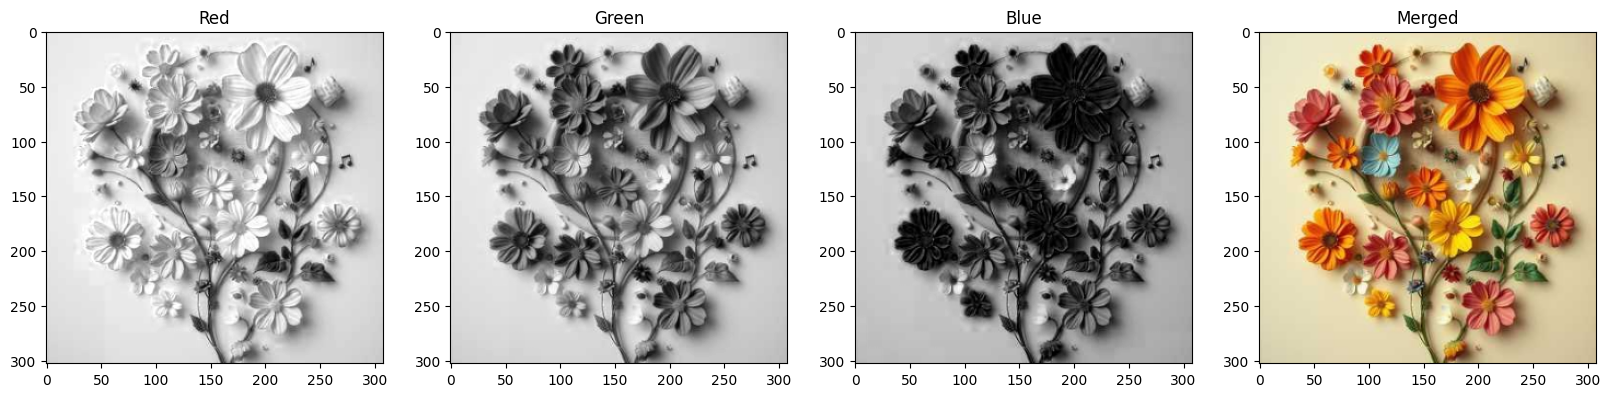

In [42]:
merged_channels = cv2.merge((b,g,r))

plt.figure(figsize=(20, 5))
plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green")
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue")

plt.subplot(144);plt.imshow(merged_channels[...,::-1]);plt.title("Merged")

Text(0.5, 1.0, 'Blue')

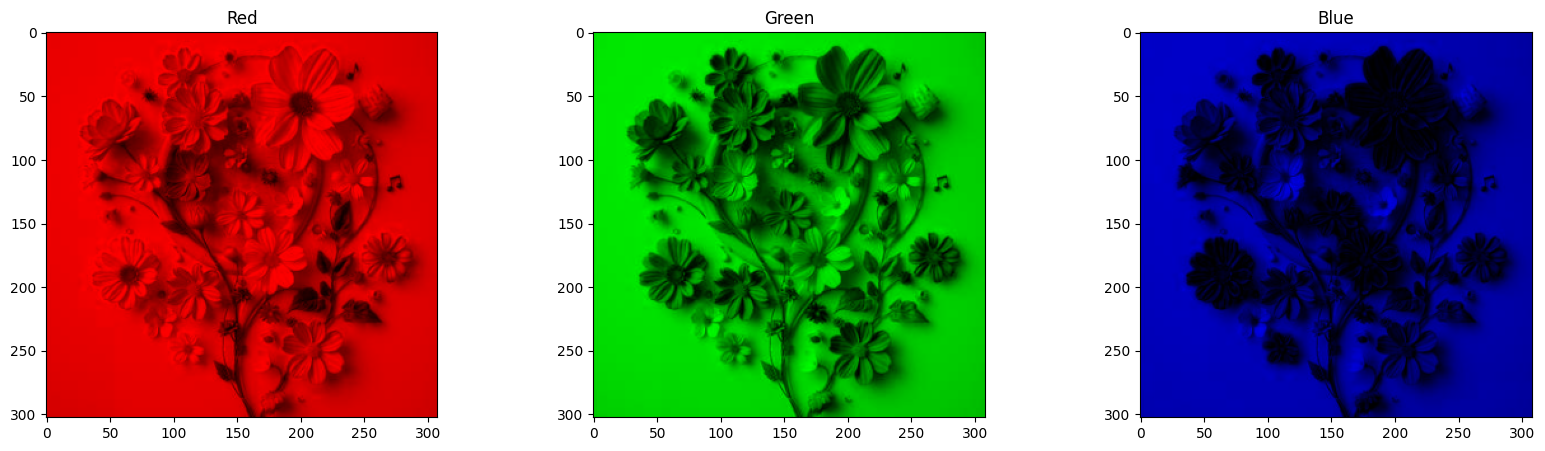

In [44]:
zeros = np.zeros_like(r, 'uint8')

red = cv2.merge([zeros,zeros,r])
green = cv2.merge([zeros,g,zeros])
blue = cv2.merge([b,zeros,zeros])

plt.figure(figsize=(20,5))
plt.subplot(131);plt.imshow(red[...,::-1]);plt.title("Red")
plt.subplot(132);plt.imshow(green[...,::-1]);plt.title("Green")
plt.subplot(133);plt.imshow(blue[...,::-1]);plt.title("Blue")

Text(0.5, 1.0, 'Merged')

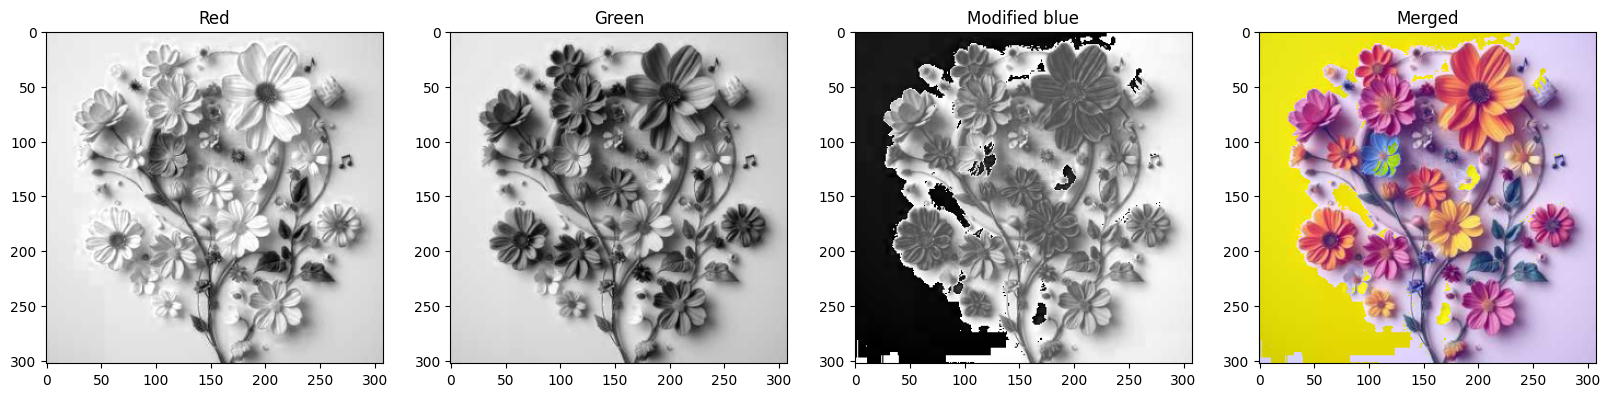

In [59]:
img = cv2.imread("../../images/4.png")
b,g,r = cv2.split(img)

modified_b = b + 80

merged = cv2.merge([modified_b, g, r])
plt.figure(figsize=(20, 5))
plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green")
plt.subplot(143);plt.imshow(modified_b, cmap="gray");plt.title("Modified blue")

plt.subplot(144);plt.imshow(merged[...,::-1]);plt.title("Merged")

Text(0.5, 1.0, 'Merged')

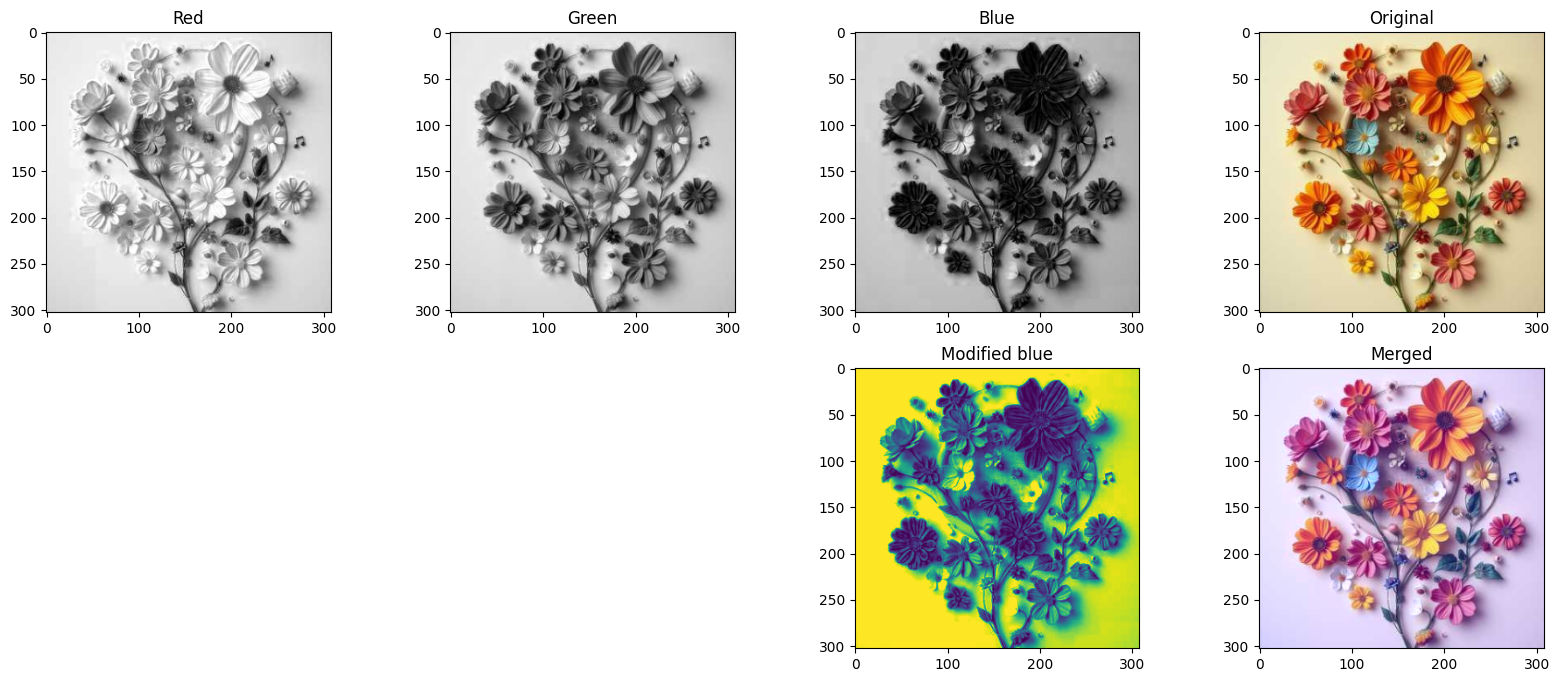

In [65]:
modified_b = b.astype(np.uint16) + 80
modified_b = np.minimum(modified_b, 255).astype(np.uint8)

merged = cv2.merge([modified_b, g, r])
plt.figure(figsize=(20, 8))
plt.subplot(241);plt.imshow(r, cmap="gray");plt.title("Red")
plt.subplot(242);plt.imshow(g, cmap="gray");plt.title("Green")
plt.subplot(243);plt.imshow(b, cmap="gray");plt.title("Blue")
plt.subplot(244);plt.imshow(img[...,::-1]);plt.title("Original")

plt.subplot(247);plt.imshow(modified_b);plt.title("Modified blue")
plt.subplot(248);plt.imshow(merged[...,::-1]);plt.title("Merged")

In [80]:
np.all(modified_b == cv2.add(b, 80))

np.True_

## HSV

Text(0.5, 1.0, 'Value')

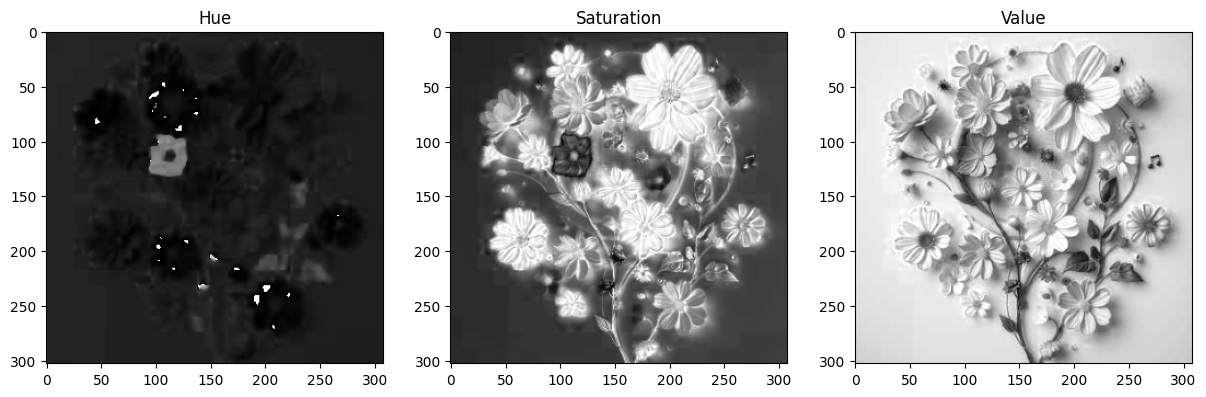

In [77]:
img = cv2.imread("../../images/4.png")
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv_img)

plt.figure(figsize=(20, 5))
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("Hue")
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("Saturation")
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("Value")

Text(0.5, 1.0, 'Saturated image')

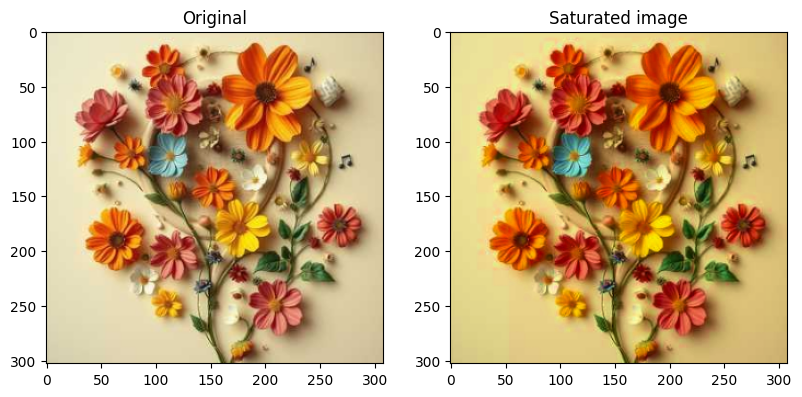

In [84]:
saturated_image = cv2.merge([
    h,
    cv2.add(s, 50),
    v
])
saturated_image = cv2.cvtColor(saturated_image, cv2.COLOR_HSV2BGR)
plt.figure(figsize=(20, 5))
plt.subplot(141);plt.imshow(img[...,::-1]);plt.title("Original")
plt.subplot(142);plt.imshow(saturated_image[...,::-1]);plt.title("Saturated image")

Text(0.5, 1.0, 'Brighter image')

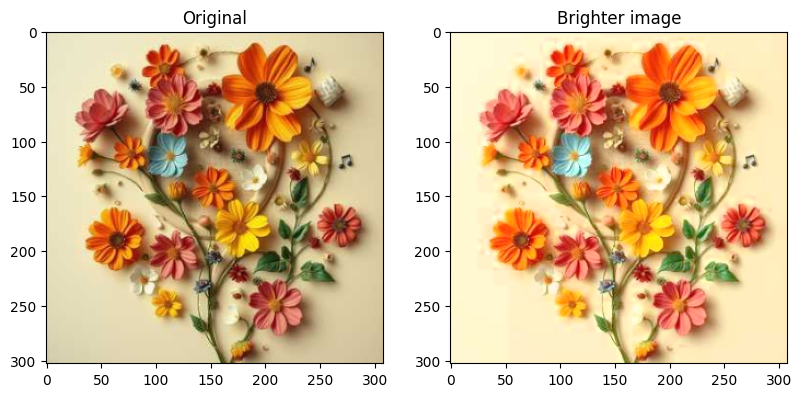

In [85]:
brighter_image = cv2.merge([
    h,
    s,
    cv2.add(v, 50),
])
brighter_image = cv2.cvtColor(brighter_image, cv2.COLOR_HSV2BGR)
plt.figure(figsize=(20, 5))
plt.subplot(141);plt.imshow(img[...,::-1]);plt.title("Original")
plt.subplot(142);plt.imshow(brighter_image[...,::-1]);plt.title("Brighter image")